# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:


#loading data
data_diabetes1 = pd.read_csv('diabetes.csv')

#turn it to dataframe
data_diabetes_df1= pd.DataFrame(data_diabetes1)

# lookin at the first few rows
print(data_diabetes_df1.head())

# Display a summary
print(data_diabetes_df1.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
#identify missing values
print(data_diabetes_df1.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
data_diabetes_df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
zero_bmi = (data_diabetes_df1['BMI'] == 0).sum()
zero_skin = (data_diabetes_df1['SkinThickness'] == 0).sum()
print(f"Zero values in 'BMI': {zero_bmi}, 'SkinThickness': {zero_skin}")

Zero values in 'BMI': 11, 'SkinThickness': 227


In [6]:
# Replace zeros with NaN

data_diabetes_df1['BMI'] = data_diabetes_df1['BMI'].replace(0, np.nan)
data_diabetes_df1['SkinThickness'] = data_diabetes_df1['SkinThickness'].replace(0, np.nan)

# replace NaN values with mean
data_diabetes_df1['BMI'].fillna(data_diabetes_df1['BMI'].mean(), inplace=True)
data_diabetes_df1['SkinThickness'].fillna(data_diabetes_df1['SkinThickness'].mean(), inplace=True)

In [7]:
zero_bmi = (data_diabetes_df1['BMI'] == 0).sum()
zero_skin = (data_diabetes_df1['SkinThickness'] == 0).sum()
print(f"Zero values in 'BMI': {zero_bmi}, 'SkinThickness': {zero_skin}")

Zero values in 'BMI': 0, 'SkinThickness': 0


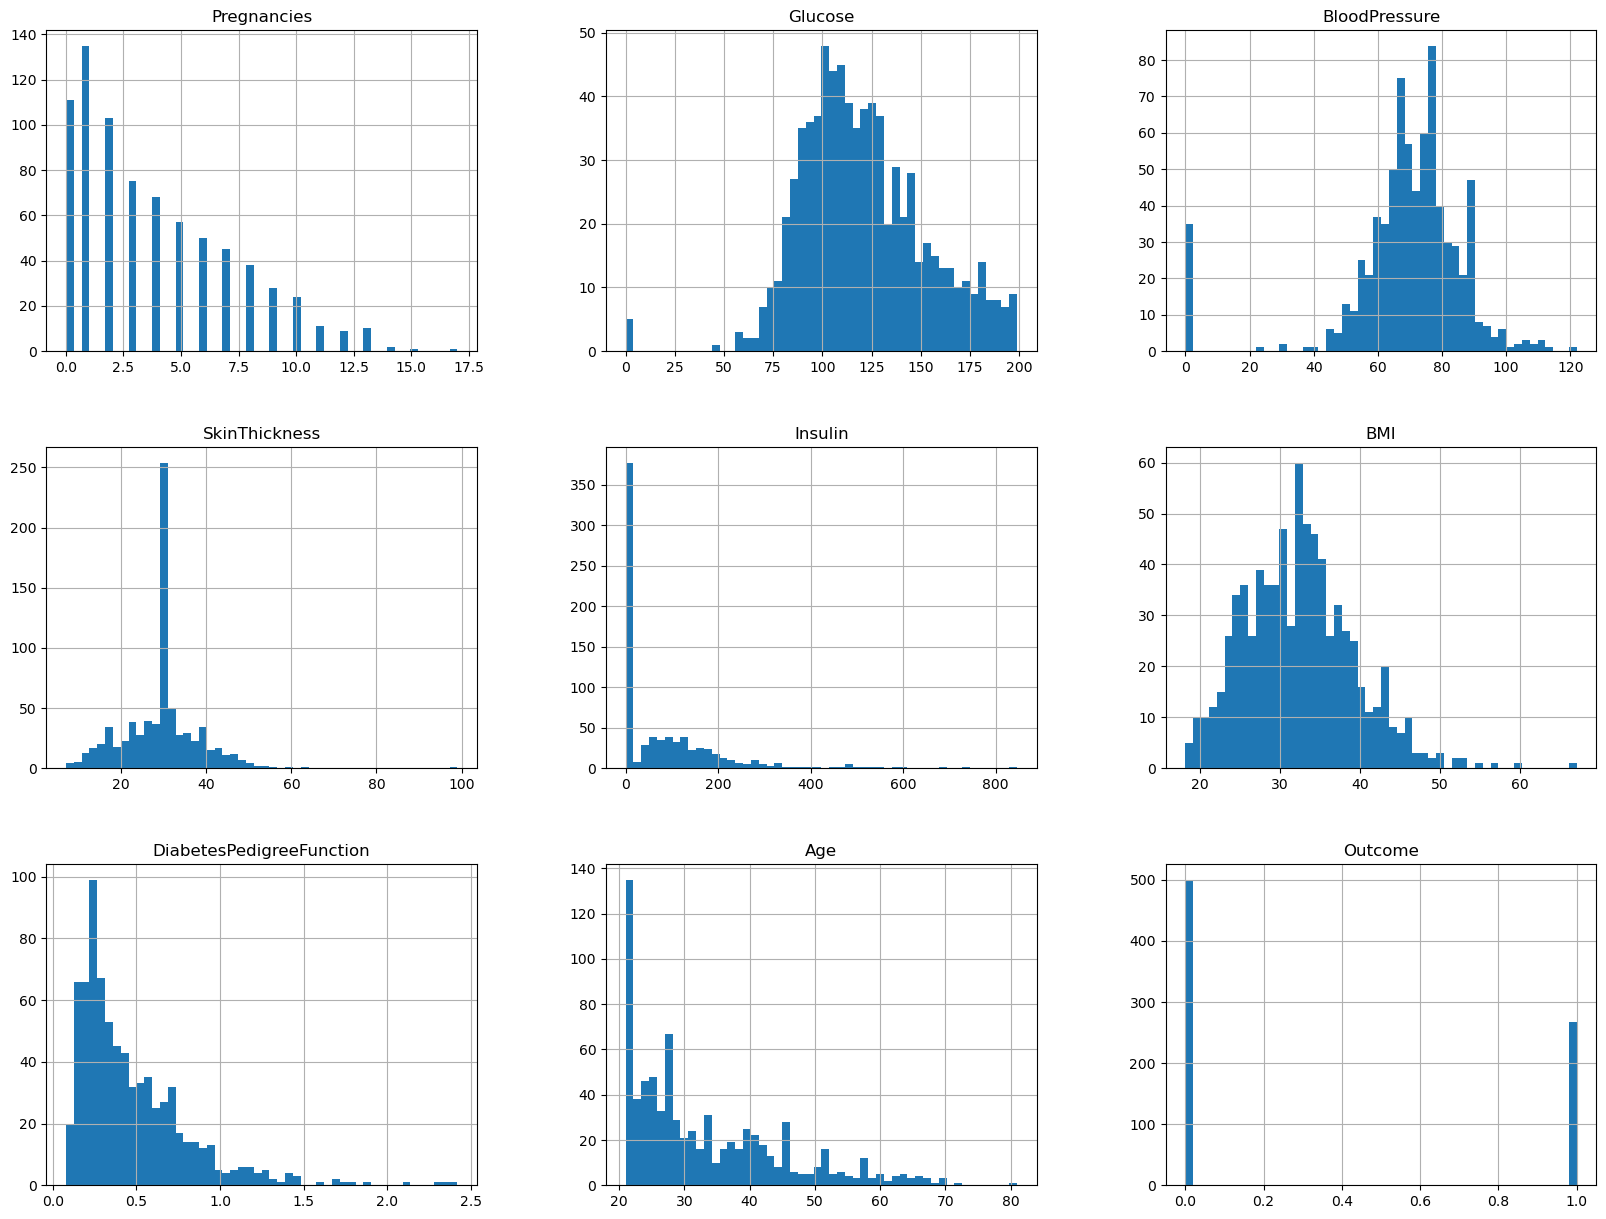

In [8]:
#distribution of each predictor
data_diabetes_df1.hist(bins=50, figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

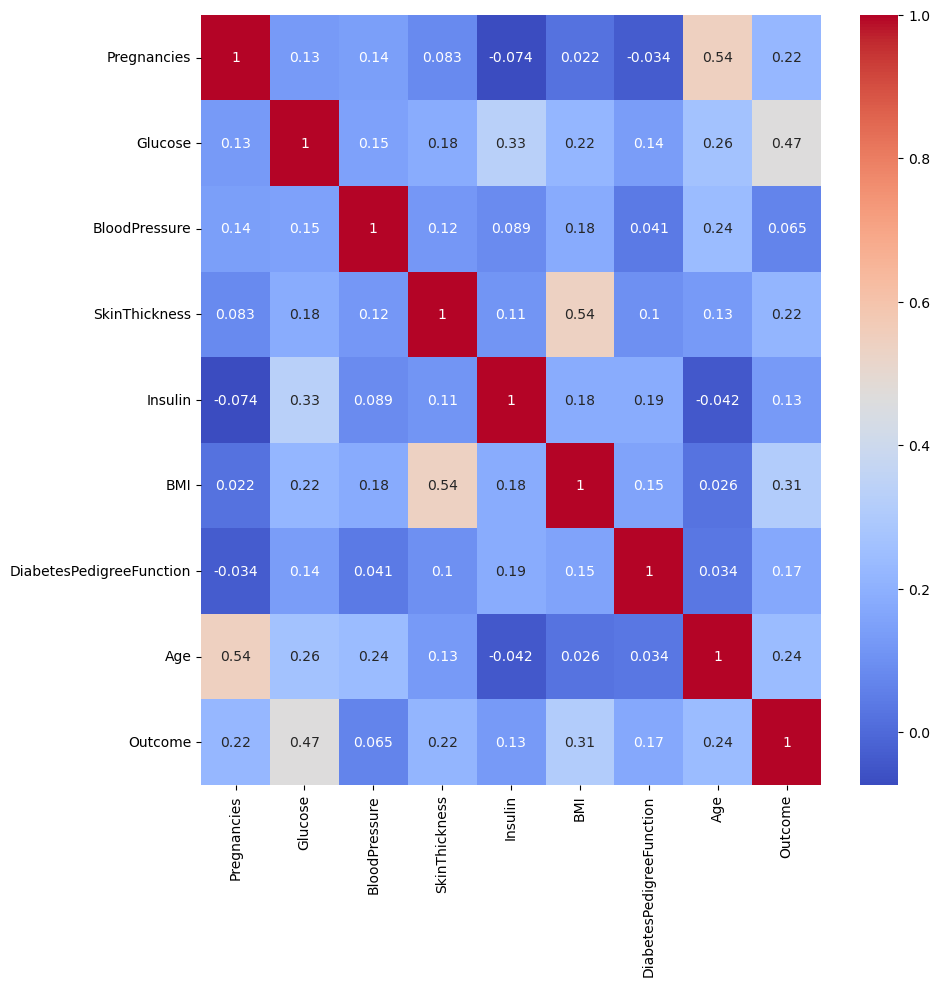

In [9]:
#Correlation between predictor variables
diabetes_matrix = data_diabetes_df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_matrix, annot= True, cmap='coolwarm')
plt.show

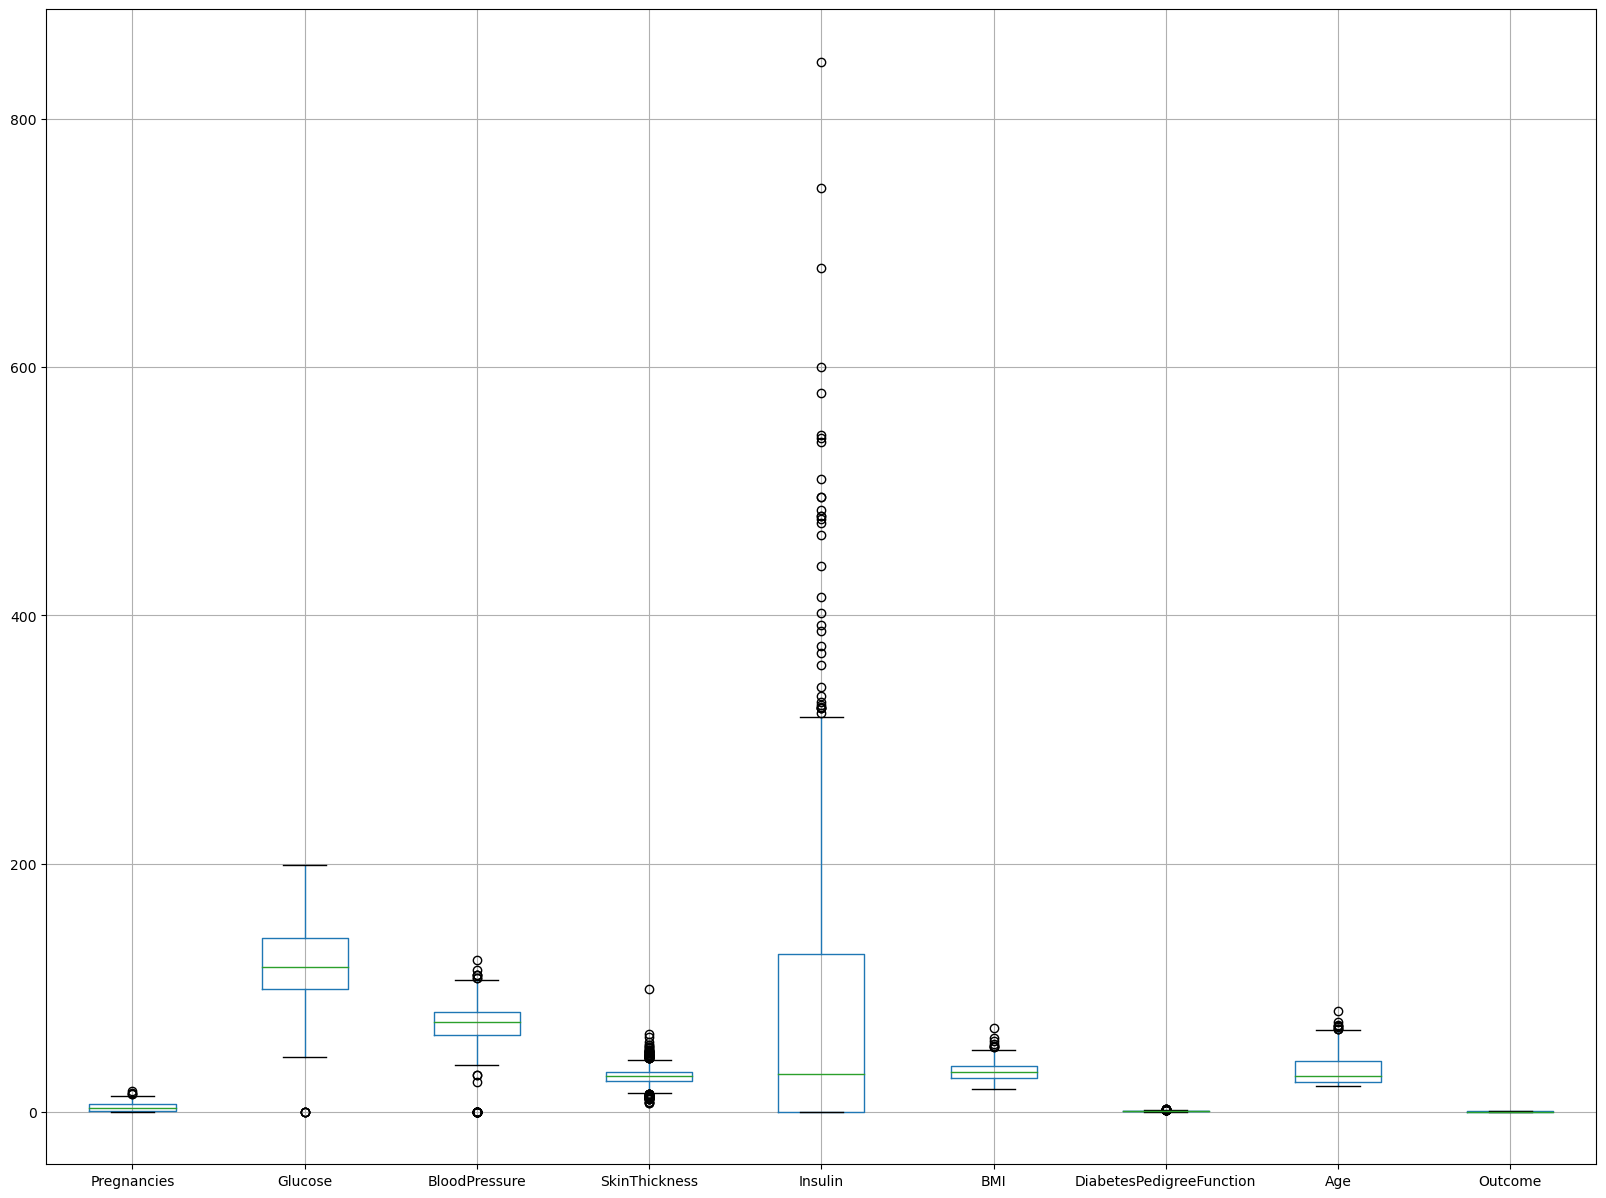

In [10]:
#identify outliers
data_diabetes_df1.boxplot(figsize=(20,15))
plt.show()

In [21]:
#Calculate Average Age 
average_age = data_diabetes_df1['Age'].mean()
print(f"Average age is: {average_age}")

Average age is: 33.240885416666664


In [20]:
#Average Glucose Level for Individuals With and Without Diabetes:
glucose_diabetes_avg = data_diabetes_df1[data_diabetes_df1['Outcome']==1]['Glucose'].mean()
glucose_no_diabetes_avg = data_diabetes_df1[data_diabetes_df1['Outcome']==0]['Glucose'].mean()

print(f"Average glucose level with diabetes: {glucose_diabetes_avg}")
print(f"Average glucose level without diabetes: {glucose_no_diabetes_avg}")


Average glucose level with diabetes: 141.25746268656715
Average glucose level without diabetes: 109.98


In [22]:
#Average BMI for Individuals With and Without Diabetes:

avg_bmi_diabetes = data_diabetes_df1[data_diabetes_df1['Outcome']==1]['BMI'].mean()
avg_bmi_no_diabetes = data_diabetes_df1[data_diabetes_df1['Outcome']==0]['BMI'].mean()

print(f"Average BMI with diabetes: {avg_bmi_diabetes}")
print(f"Average BMI without diabetes: {avg_bmi_no_diabetes}")


Average BMI with diabetes: 35.38475719158496
Average BMI without diabetes: 30.888434346103004


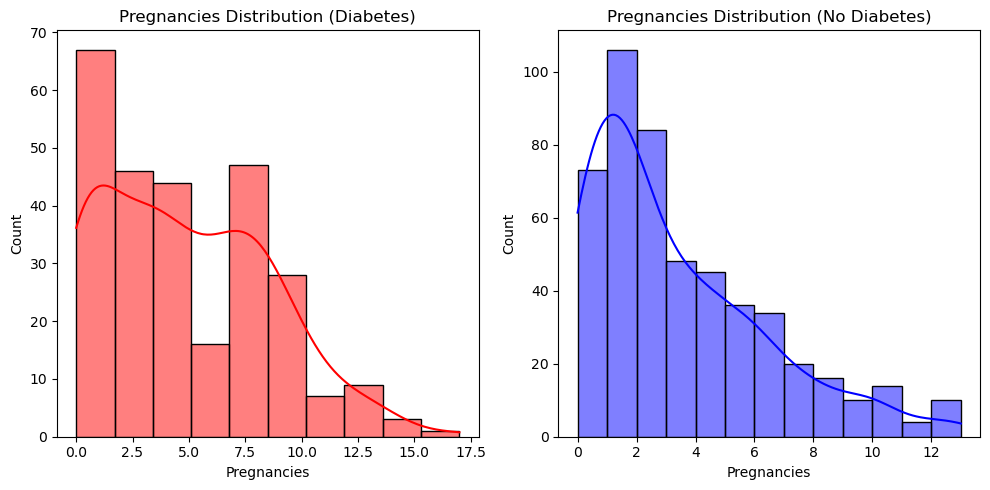

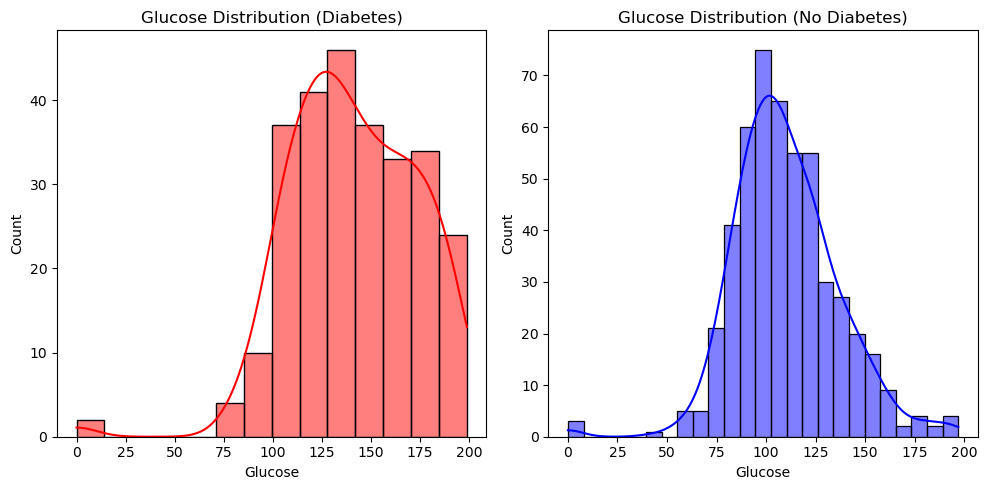

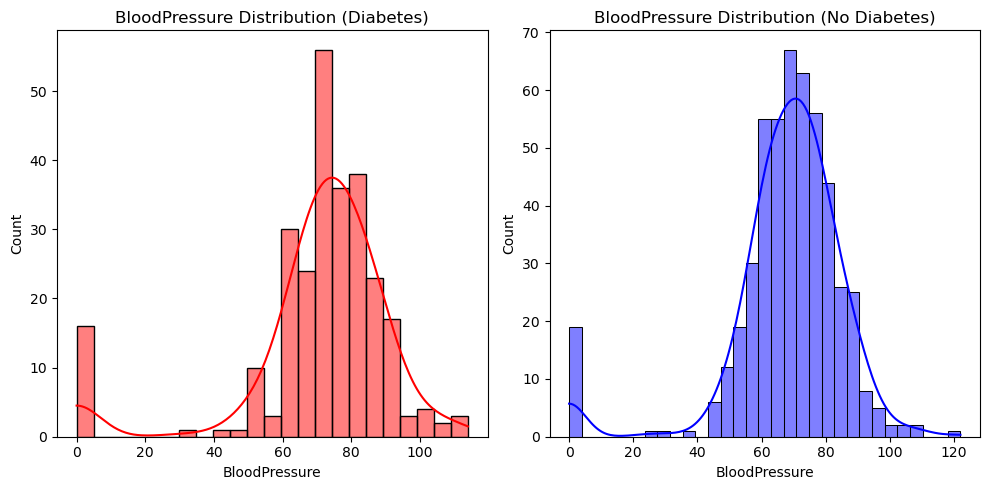

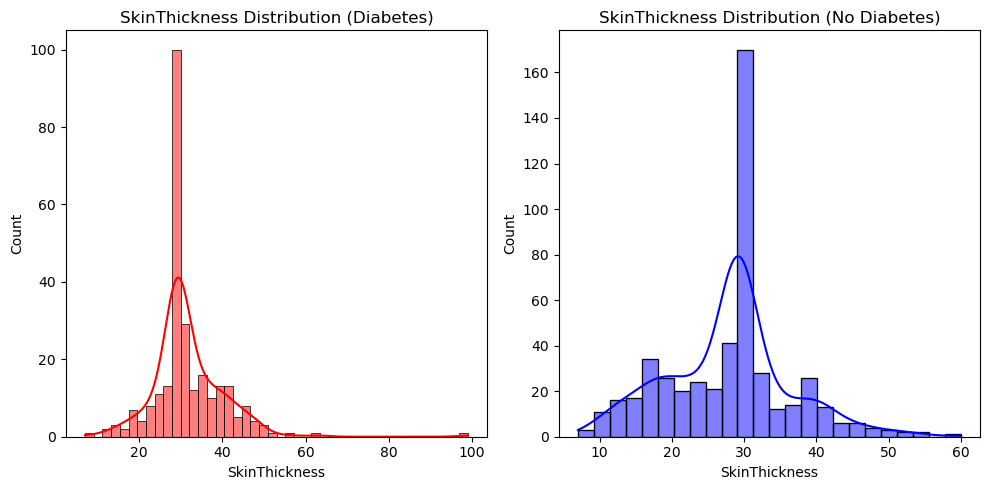

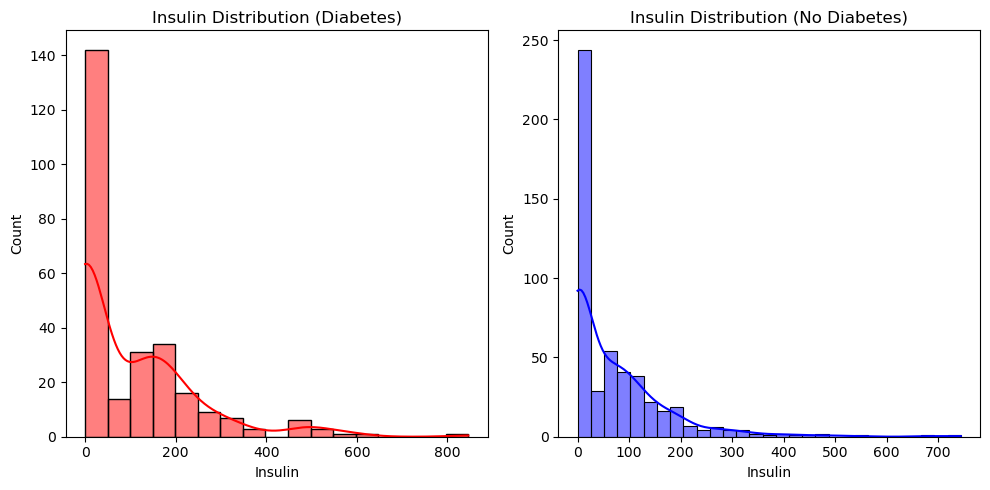

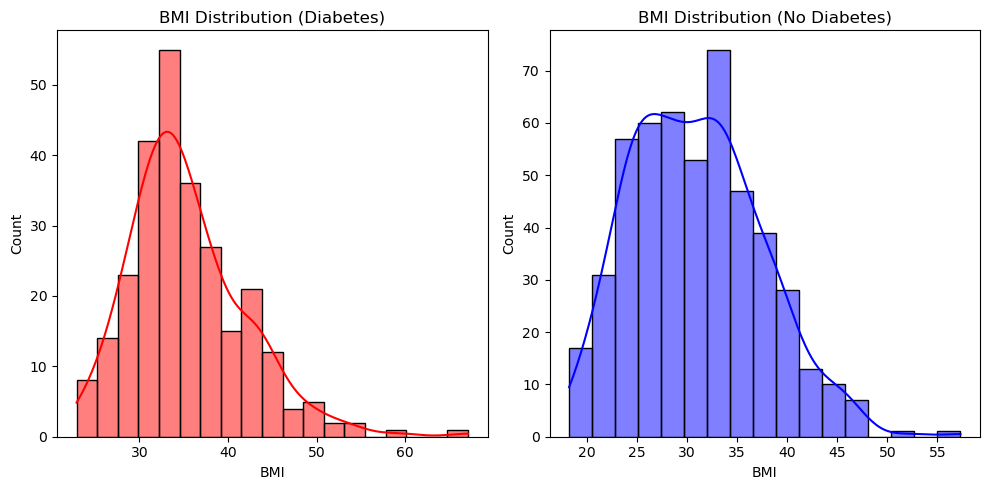

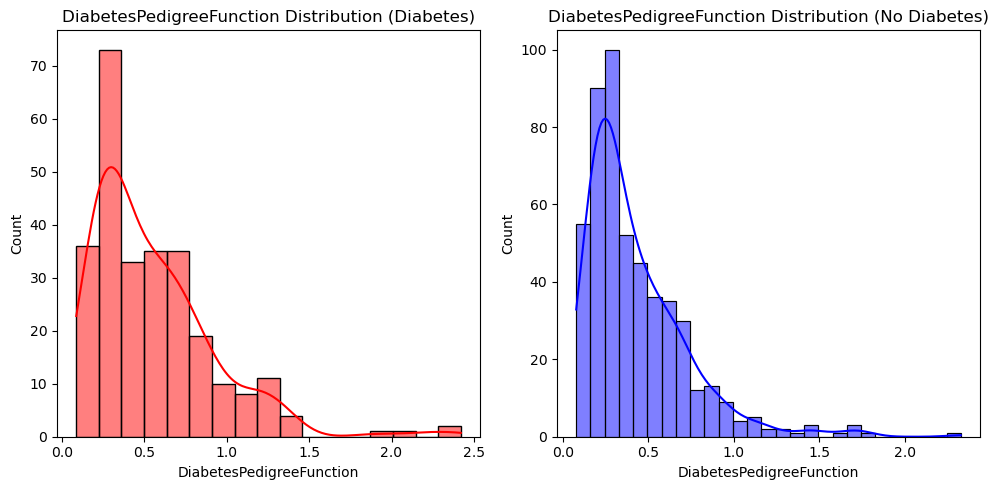

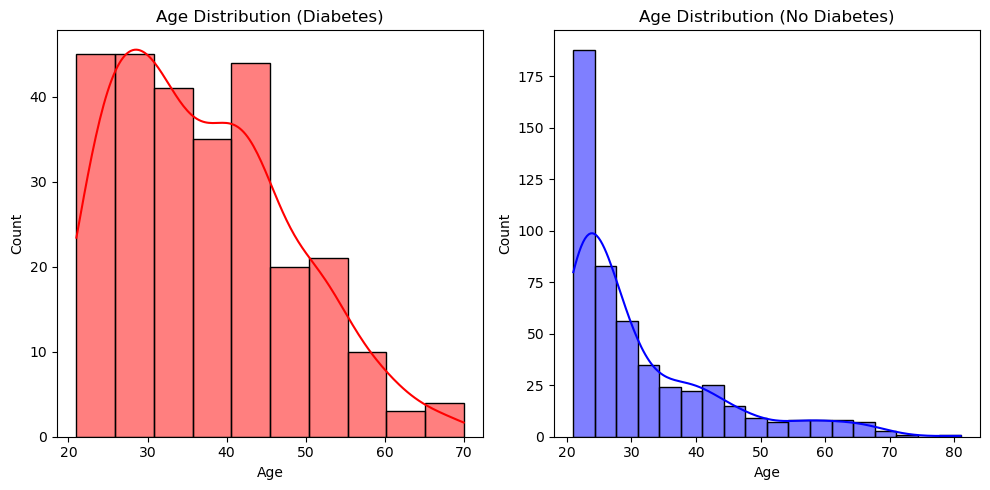

In [23]:
#Distribution of Predictor Variables for Individuals With and Without Diabetes:

predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Separate data based on the Outcome
diabetes_yes = data_diabetes_df1[data_diabetes_df1['Outcome'] == 1]
diabetes_no  = data_diabetes_df1[data_diabetes_df1['Outcome'] == 0]

# Loop over all predictor variables to create histograms
for var in predictors:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.histplot(diabetes_yes[var], color='red', kde=True)
    plt.title(f'{var} Distribution (Diabetes)')

    plt.subplot(1,2,2)
    sns.histplot(diabetes_no[var], color='blue', kde=True)
    plt.title(f'{var} Distribution (No Diabetes)')

    plt.tight_layout()
    plt.show()





# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [11]:
#handling outliers
Q1 = data_diabetes_df1.quantile(0.25)
Q3 = data_diabetes_df1.quantile(0.75)
IQR = Q3 - Q1
data_diabetes_df = data_diabetes_df1[~((data_diabetes_df1 < (Q1 - 1.5 * IQR)) | (data_diabetes_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [13]:
# Scaling and normalization
from sklearn.preprocessing import StandardScaler

X = data_diabetes_df1.drop('Outcome', axis=1)
y = data_diabetes_df1['Outcome']

scaler = StandardScaler()

X_data_diabetes_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

print(X_data_diabetes_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641   6.655021e-01 -0.692891  0.166292   
1      -0.844885 -1.123396      -0.160546  -1.746338e-02 -0.692891 -0.852531   
2       1.233880  1.943724      -0.263941   8.087936e-16 -0.692891 -1.332833   
3      -0.844885 -0.998208      -0.160546  -7.004289e-01  0.123302 -0.634212   
4      -1.141852  0.504055      -1.504687   6.655021e-01  0.765836  1.548980   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432   2.145261e+00  0.870031  0.064409   
764    -0.547919  0.034598       0.046245  -2.451185e-01 -0.692891  0.632039   
765     0.342981  0.003301       0.149641  -7.004289e-01  0.279594 -0.910750   
766    -0.844885  0.159787      -0.470732   8.087936e-16 -0.692891 -0.343120   
767    -0.844885 -0.873019       0.046245   2.101918e-01 -0.692891 -0.299456   

     DiabetesPedigreeFunction       Age

In [14]:
#feature engineering
#def bmi_category(bmi):
 #   if bmi< 18.5 :
#    return'underweight'
#  elif 18.5 <= bmi < 25:
 #       return 'normal weight'
  #  elif 25 <= bmi < 30:
   #     return 'Overweight'
    #else:
     #   return'Obese'
    
    
    
    
#X_data_diabetes_scaled['bmi_category']=X_data_diabetes_scaled['BMI'].apply(bmi_category)



In [16]:
#handling imbalanced data
from sklearn.utils import resample


diabetes_imbalanced = data_diabetes_df1['Outcome'].value_counts()
print(diabetes_imbalanced)


0    500
1    268
Name: Outcome, dtype: int64


In [24]:
#handling imbalanced data
from imblearn.over_sampling import RandomOverSampler

#strategy of oversampling

diabetes_1_oversample = RandomOverSampler(sampling_strategy= 'minority')

X_over, y_over = diabetes_1_oversample.fit_resample(X_data_diabetes_scaled, y)

In [25]:
# Convert the oversampled data to a dataframe
X_features_df = pd.DataFrame(X_over, columns=X.columns)

# Convert the target to a dataframe
y_target_df = pd.DataFrame(y_over, columns=['Outcome'])

# create the new dataframe
new_diabetes_df = pd.concat([X_features_df, y_target_df], axis=1)

In [68]:
diabetes_distribution2 = new_diabetes_df['Outcome'].value_counts()
print(diabetes_distribution2)

1    439
0    439
Name: Outcome, dtype: int64


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [26]:
# split data to train and test
from sklearn.model_selection import train_test_split

X1 = new_diabetes_df.drop('Outcome', axis=1)
y1 = new_diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [27]:
#train the model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()

#fit models

logistic_model.fit(X_train,y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
#evaluate the models 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# models to make predictions
y_predict_logistic = logistic_model.predict(X_test)
y_predict_forest = random_forest_model.predict(X_test)

# Calculate the evaluation metrics for the logistic model
accuracy_logistic = accuracy_score(y_test, y_predict_logistic)
precision_logistic = precision_score(y_test, y_predict_logistic)
recall_logistic = recall_score(y_test, y_predict_logistic)
f1_logistic = f1_score(y_test, y_predict_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_predict_logistic)

print('Evaluation metrics for logistic model :\n accuracy' ,accuracy_logistic, '\n precision :',precision_logistic, '\n recall : ',recall_logistic, '\n f1_logistic: ',f1_logistic,'\n roc_auc:' ,roc_auc_logistic )

#metrics for the random forest model
accuracy_forest = accuracy_score(y_test, y_predict_forest)
precision_forest = precision_score(y_test, y_predict_forest)
recall_forest = recall_score(y_test, y_predict_forest)
f1_forest = f1_score(y_test, y_predict_forest)
roc_auc_forest = roc_auc_score(y_test, y_predict_forest)

print('Evaluation metrics for forest model :\n accuracy' ,accuracy_forest, '\n precision :',precision_forest, '\n recall : ',recall_forest, '\n f1_logistic: ',f1_forest,'\n roc_auc:' ,roc_auc_forest )

 

Evaluation metrics for logistic model :
 accuracy 0.725 
 precision : 0.7346938775510204 
 recall :  0.7128712871287128 
 f1_logistic:  0.7236180904522613 
 roc_auc: 0.7251225122512251
Evaluation metrics for forest model :
 accuracy 0.805 
 precision : 0.7818181818181819 
 recall :  0.8514851485148515 
 f1_logistic:  0.8151658767772512 
 roc_auc: 0.8045304530453046


the best-performing model based on the evaluation metrics is #Random Forest model 

In [29]:
#GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# search space
space = dict()
space['n_estimators'] = [2,20, 50]
space['max_features'] = ['sqrt', 'log2']
space['max_depth'] = [None, 10, 20, 30]
space['min_samples_split'] = [2, 5, 10]
space['min_samples_leaf'] = [1, 2, 4]

# define search
search = GridSearchCV(random_forest_model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_over, y_over)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8640000000000001
Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##These 4 findings are insightful informations about diabetes datasets and they are helpful to understand 
how machine learning models can be used to optimize pridection:

#Data Imbalance: The original dataset was imbalanced, with the majority class being those without diabetes. This imbalance was handled using oversampling technique, which helped in creating a more balanced dataset for model training.

#Correlation Between Variables: The EDA reveal that some predictor variables like glucose level, bloodPressure, and BMI were found to have a strong correlation with the diabetes outcome. This suggests these factors play a significant role in diabetes diagnosis.

#Outliers : Outliers were found and handled in the dataset ensuring a cleaner dataset for model building.

#Model Performance: Among the models developed, the Random Forest Classifier showed the best performance. After hyperparameter tuning, it delivered superior results compared to the Logistic Regression model based on evaluation metrics such as accuracy, precision, recall, and F1-score.